<a href="https://colab.research.google.com/github/preetamjumech/pytorch/blob/main/ANN_Fashion_MNIST_25_12_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [3]:
df = pd.read_csv('/content/mnist_train.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


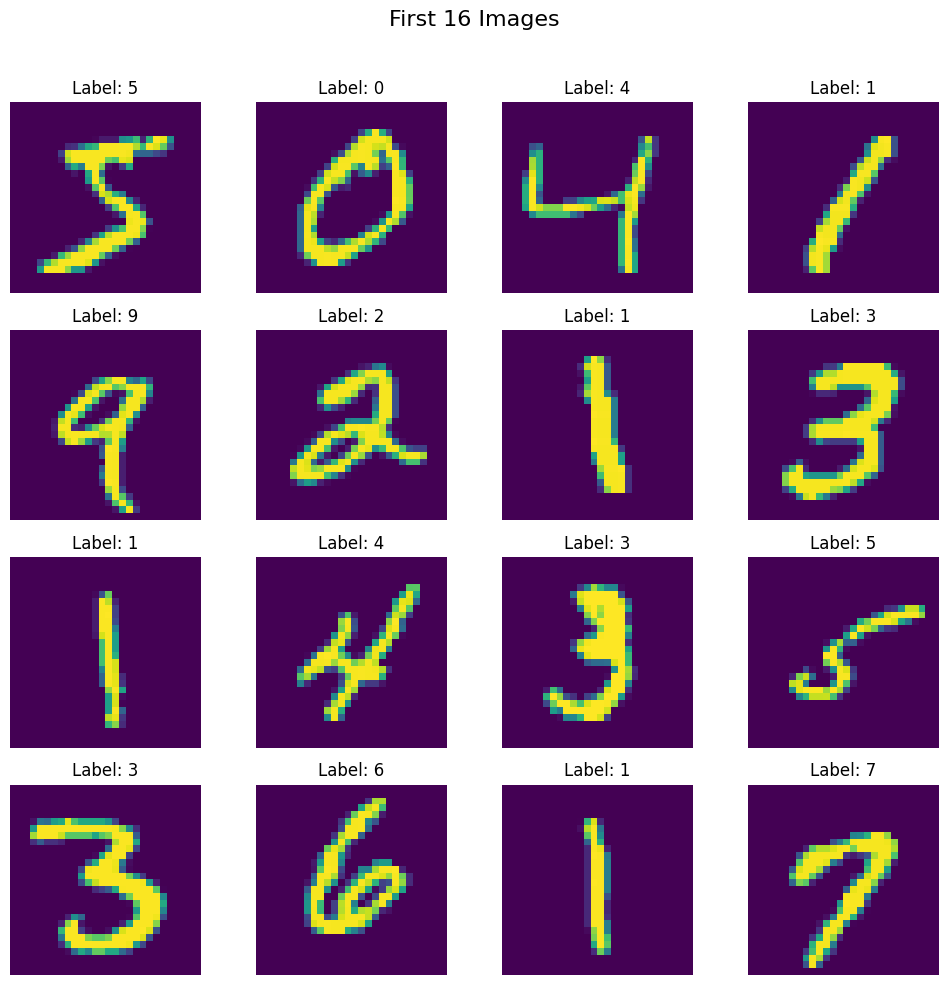

In [4]:
fig, axes = plt.subplots(4,4 , figsize = (10,10))
fig.suptitle("First 16 Images", fontsize = 16)

for i, ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis("off")
  ax.set_title(f"Label: {df.iloc[i,0]}")

plt.tight_layout(rect = [0,0,1,0.96])
plt.show()

In [6]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype = torch.float32)
    self.labels = torch.tensor(labels, dtype = torch.long)

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [10]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [11]:
len(train_dataset)

48000

In [12]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [13]:
len(test_dataset)

12000

In [15]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle= True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

In [17]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [18]:
class MyNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )


  def forward(self, X):
    return self.model(X)

In [19]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [21]:
model = MyNN(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [22]:
len(train_loader)

1500

In [24]:
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:
    outputs = model(batch_features)
    loss = criterion(outputs, batch_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss / len(train_loader)
  print(f"Epoch: {epoch+1}, loss: {avg_loss}")

Epoch: 1, loss: 0.430308335048457
Epoch: 2, loss: 0.15671813756631067
Epoch: 3, loss: 0.1054848997501346
Epoch: 4, loss: 0.08004228958142146
Epoch: 5, loss: 0.06299688551493454
Epoch: 6, loss: 0.052228325924486854
Epoch: 7, loss: 0.040721096668120786
Epoch: 8, loss: 0.033594314569782
Epoch: 9, loss: 0.02642629242236338
Epoch: 10, loss: 0.02095644445900689
Epoch: 11, loss: 0.015894832910897095
Epoch: 12, loss: 0.012035564086507898
Epoch: 13, loss: 0.010725225517857324
Epoch: 14, loss: 0.007277460208387008
Epoch: 15, loss: 0.005454110106882581
Epoch: 16, loss: 0.0038212354607670327
Epoch: 17, loss: 0.003175657152212504
Epoch: 18, loss: 0.0017468432809270478
Epoch: 19, loss: 0.0011542907483052052
Epoch: 20, loss: 0.0009574233805272645
Epoch: 21, loss: 0.0007785682537569301
Epoch: 22, loss: 0.0007131363907537889
Epoch: 23, loss: 0.0006189989530100017
Epoch: 24, loss: 0.0006146547100139893
Epoch: 25, loss: 0.0005244557329924646
Epoch: 26, loss: 0.0004967404665165229
Epoch: 27, loss: 0.00045

In [25]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [26]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)
    _, predicted = torch.max(outputs, 1)
    total = total + batch_labels.shape[0]
    correct = correct + (predicted  == batch_labels).sum().item()

print(correct/total)


0.9815
